# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

###Not for Grading


####Classification using MLP 

The objective of this case study is to understand classification i.e., if the price of the house is low (0) or high (1) using Multilayer perceptron.  The package used here is [PyTorch](https://pytorch.org/). 

##*We will see more on PyTorch in the upcoming sessions.*

#### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P18_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "912345678" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="M1W2_CS_5_MLP_Classifier" #name of the notebook

def setup():
    #ipython.magic("sx wget https://www.dropbox.com/s/vu7xkf6j3v9p5np/AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt.zip?dl=1")
   # ipython.magic("sx unzip AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt.zip?dl=1")
    ipython.magic("sx pip install torch")
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print("Please enter valid Id")
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful. Ref:", submission_id)
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages 

In [0]:
# Importing required Packages
import matplotlib.pyplot as plt
import numpy as np
import  torch
from torch import nn
from sklearn.preprocessing import StandardScaler

###The attributes of related House price are stored in "X" as features and the House price whether it is low (0) or high (1) are stored in "y" as labels.

In [0]:
X = np.array([[3, 2000, 90], [2, 800, 143], [2, 850, 167], [1, 550, 267], [4, 2000, 396]])
y = np.array([1, 0, 0, 0 , 1])

###Standard scaling the features "X"

In [0]:
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)
X

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.58834841,  1.20863526, -1.13296108],
       [-0.39223227, -0.6997362 , -0.64318182],
       [-0.39223227, -0.62022073, -0.42139498],
       [-1.37281295, -1.09731359,  0.50271682],
       [ 1.56892908,  1.20863526,  1.69482106]])

###Defining the model for Linear Classification with MLP using PyTorch's nn.Module

In [0]:
class LinearClassificationModel(nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearClassificationModel, self).__init__() 
        # Calling Super Class's constructor
        self.linear1 = nn.Linear(input_dim, 4)
        self.linear2 = nn.Linear(4, output_dim)
        self.activation= nn.Sigmoid()
        # nn.Linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function
        #print(x.size())
        out = self.linear1(x)
        out = self.activation(out)
        out = self.linear2(out)
        out = self.activation(out)
        return out

input_dim = 3
output_dim = 1

###The LinearClassificationModel() is saved in model below

In [0]:
model = LinearClassificationModel(input_dim,output_dim) 
criterion = nn.MSELoss() 
l_rate = 0.01  #Learning Rate
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) #Stochastic Gradient Descent
epochs = 5000  #number of epochs

###Storing the losses in a list for the prescribed epochs 

In [0]:
losses = []
for epoch in range(epochs):
#increase the number of epochs by 1 every time
    epoch +=1
  #inputs and labels are stored in a particular format as per the model
    inputs = torch.from_numpy(X.astype(np.float32))
    labels = torch.from_numpy(y.astype(np.float32))
    labels = labels.type(torch.long)  
    #clear grads as discussed in prev post
    optimiser.zero_grad()
    #forward to get predicted values
    outputs = model.forward(inputs)
    print('outputs: ', outputs)
    print('labels: ', labels)
    print('outputs size: ', outputs.size())
    print('labels size: ', labels.size())
    loss = criterion(outputs,labels.float())
    print('loss:', loss)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.item()))
    losses.append(loss.item())
    if (epoch-1)%50 == 0:
        for i in model.parameters():
            print(i)

outputs:  tensor([[0.5069],
        [0.5146],
        [0.5162],
        [0.5301],
        [0.5226]], grad_fn=<SigmoidBackward>)
labels:  tensor([1, 0, 0, 0, 1])
outputs size:  torch.Size([5, 1])
labels size:  torch.Size([5])
loss: tensor(0.2540, grad_fn=<MseLossBackward>)
epoch 1, loss 0.2540026307106018
Parameter containing:
tensor([[ 0.1695,  0.3477,  0.3501],
        [ 0.3820,  0.1236, -0.0706],
        [-0.2374, -0.3040, -0.4713],
        [-0.3536,  0.0195, -0.0840]], requires_grad=True)
Parameter containing:
tensor([-0.4477,  0.4610,  0.1569, -0.5581], requires_grad=True)
Parameter containing:
tensor([[ 0.1697, -0.4718, -0.0722, -0.0590]], requires_grad=True)
Parameter containing:
tensor([0.3518], requires_grad=True)
outputs:  tensor([[0.5066],
        [0.5143],
        [0.5160],
        [0.5298],
        [0.5223]], grad_fn=<SigmoidBackward>)
labels:  tensor([1, 0, 0, 0, 1])
outputs size:  torch.Size([5, 1])
labels size:  torch.Size([5])
loss: tensor(0.2539, grad_fn=<MseLossBackwa

###Plotting Loss vs Epochs graph

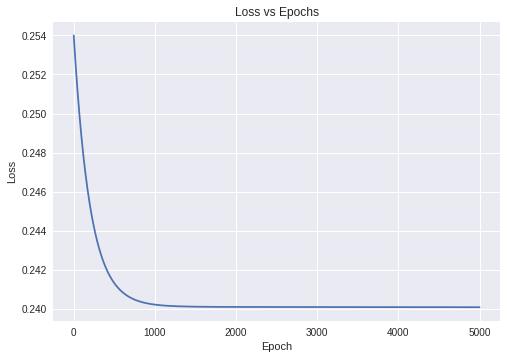

In [0]:
fig,ax = plt.subplots(1)
plt.title('Loss vs Epochs')
ax.plot(losses)
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
plt.savefig('Loss_vs_Epoch.png')